In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
plt.rcParams['figure.figsize'] = [15, 10]

In [32]:
df = pd.read_csv('out.csv')

In [33]:
boundary_score = [0.95,0.9,0.85,0.15,0.5]
interval_score = [0.05,0.1,0.15,0.85,0.5]

In [34]:
df.fillna(0,inplace=True)

In [42]:
for i in range(len(boundary_score)):
    df['jacc_'+str(boundary_score[i])+'_'+str(interval_score[i])] = boundary_score[i]*df['Jaccord'] + interval_score[i]*df['VI_boundaryless']

In [43]:
df.columns

Index(['start', 'end', 'VI', 'Jaccord', 'Overlap', 'Dice', 'VI_boundaryless',
       'p-value', 'jacc_0.95_0.05', 'jacc_0.9_0.1', 'jacc_0.85_0.15',
       'jacc_0.15_0.85', 'jacc_0.5_0.5'],
      dtype='object')

In [60]:
df[['Jaccord','jacc_0.95_0.05', 'jacc_0.9_0.1', 'jacc_0.85_0.15','jacc_0.15_0.85', 'jacc_0.5_0.5','Overlap','Dice']].corrwith(df['VI'])

Jaccord           0.537286
jacc_0.95_0.05    0.538293
jacc_0.9_0.1      0.539401
jacc_0.85_0.15    0.540628
jacc_0.15_0.85    0.606020
jacc_0.5_0.5      0.555033
Overlap          -0.573082
Dice              0.492821
dtype: float64

Text(0, 0.5, 'Similarity')

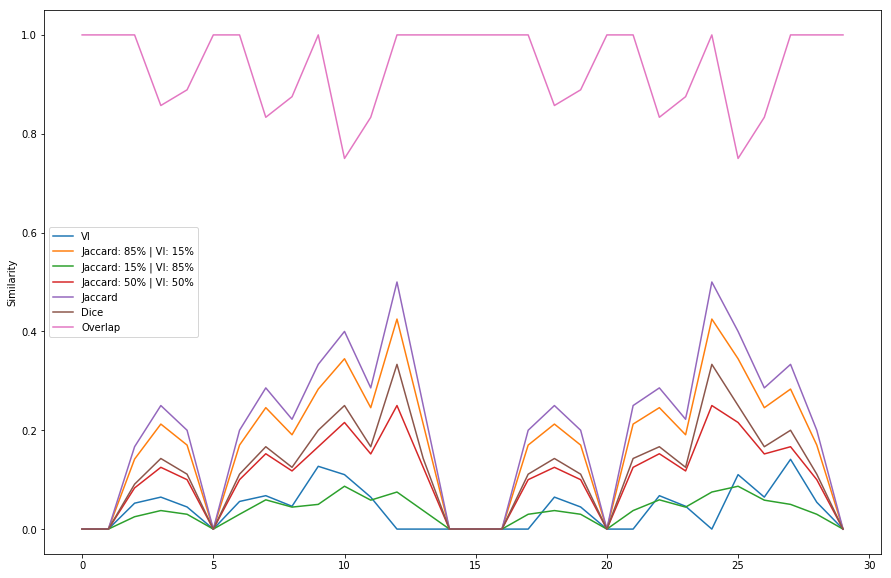

In [63]:
ax = df.plot(y=['VI', 'jacc_0.85_0.15','jacc_0.15_0.85','jacc_0.5_0.5','Jaccord','Dice','Overlap'])
ax.legend(['VI','Jaccard: 85% | VI: 15%','Jaccard: 15% | VI: 85%','Jaccard: 50% | VI: 50%','Jaccard','Dice','Overlap'])
ax.set_ylabel('Similarity')